<a href="https://colab.research.google.com/github/trailrun/ML_books/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
credit = pd.read_csv('/content/drive/MyDrive/ML_sample/credit_final.csv')
credit.columns = [feature.replace(' ', '_') for feature in credit.columns]
credit

,Creditability,Account_Balance,Duration_of_Credit_(month),Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings/Stocks,Length_of_current_employment,Instalment_per_cent,Sex_&_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_(years),Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [62]:
feature_columns = list(credit.columns.difference(['Creditability']))
X = credit[feature_columns]
y = credit['Creditability']

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape )

(700, 20) (300, 20) (700,) (300,)


In [63]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=5)

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(test_x)
test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))




[[ 31  59]
 [ 38 172]]


정확도	67.67%
정밀도	74.46%
재현율	81.9%


In [65]:
from sklearn.metrics import classification_report
report =classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       0.45      0.34      0.39        90
           1       0.74      0.82      0.78       210

    accuracy                           0.68       300
   macro avg       0.60      0.58      0.58       300
weighted avg       0.66      0.68      0.66       300



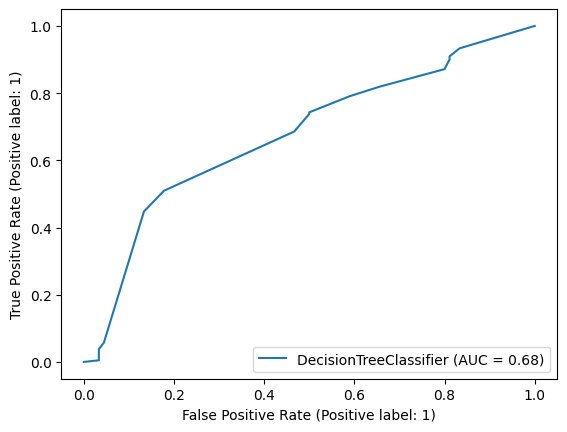

ROC_AUC_score :  0.6760052910052909


In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(clf, test_x, test_y)
plt.show()

R_A_score = roc_auc_score(test_y, clf.predict_proba(test_x)[:,1])
print('ROC_AUC_score : ', R_A_score)

In [67]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(X.columns)
feature_importance = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importance.columns = ['feature_nm', 'importances']
print(feature_importance)

                           feature_nm  importances
0                     Account_Balance     0.270910
1                         Age_(years)     0.102007
2                  Concurrent_Credits     0.036190
3                       Credit_Amount     0.146285
4         Duration_in_Current_address     0.020651
5          Duration_of_Credit_(month)     0.185133
6                      Foreign_Worker     0.000000
7                          Guarantors     0.000000
8                 Instalment_per_cent     0.000000
9        Length_of_current_employment     0.000000
10      Most_valuable_available_asset     0.000000
11         No_of_Credits_at_this_Bank     0.000000
12                   No_of_dependents     0.000000
13                         Occupation     0.000000
14  Payment_Status_of_Previous_Credit     0.121996
15                            Purpose     0.000000
16               Sex_&_Marital_Status     0.016084
17                          Telephone     0.003872
18                  Type_of_apa

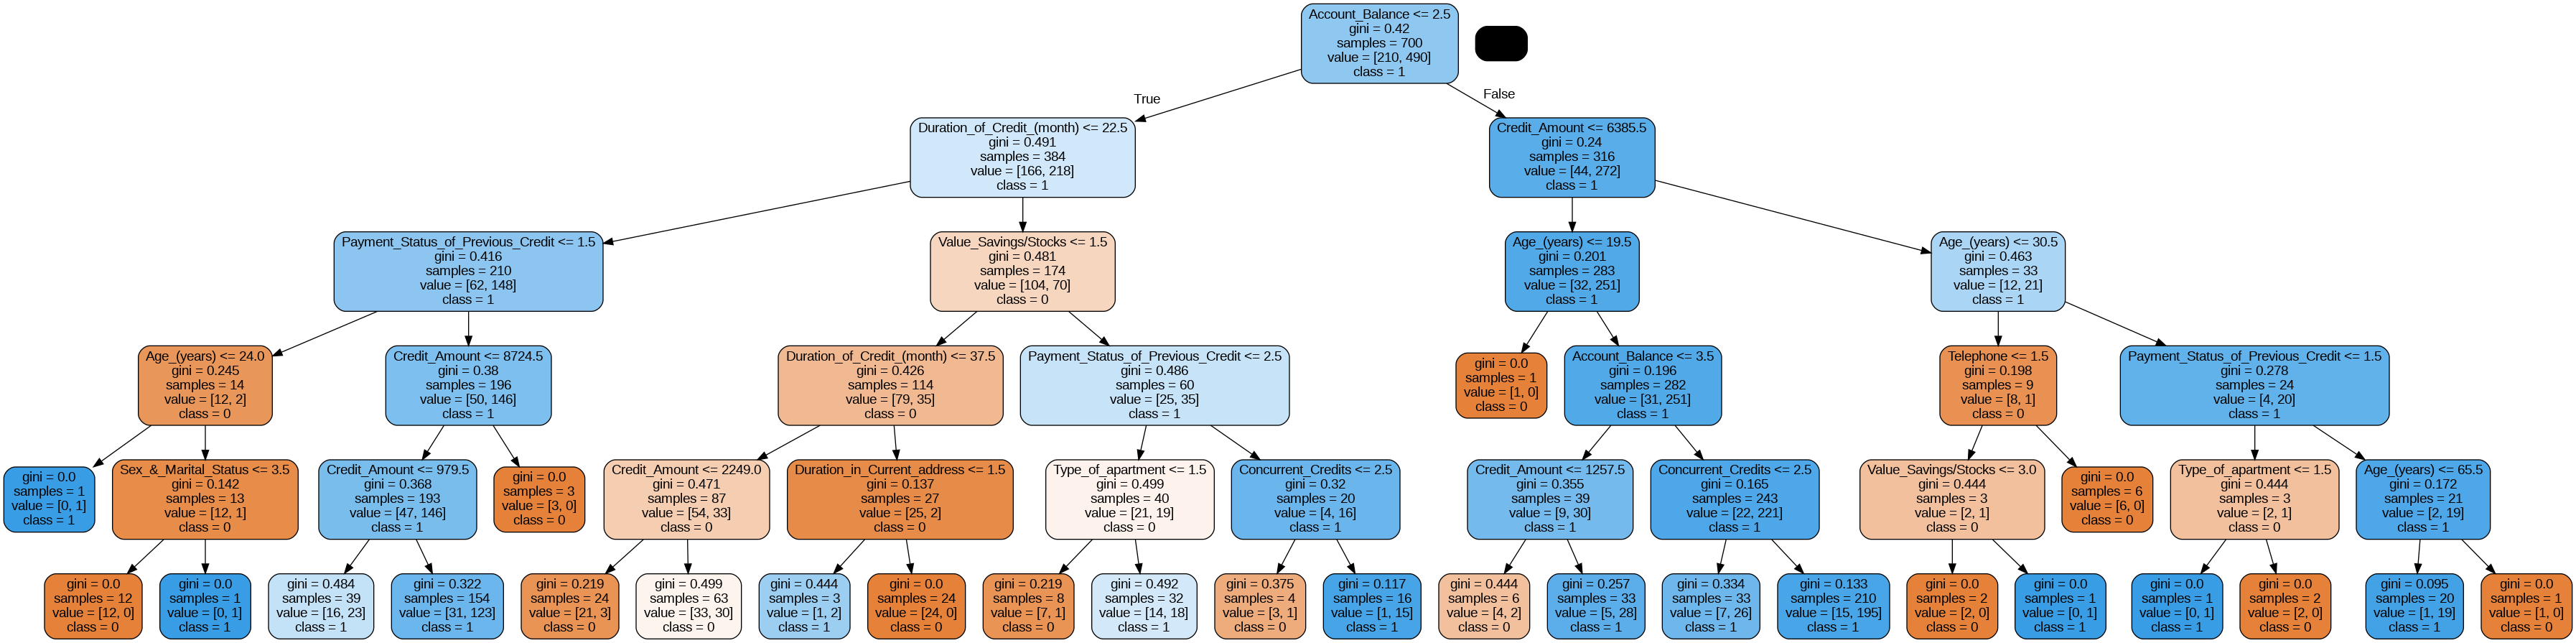

In [70]:
import numpy as np
target_names = np.array(['0', '1'])

import pydot
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
dt_dot_data = export_graphviz(clf, feature_names = feature_names,
                              class_names = target_names,
                              filled=True, rounded=True,
                              special_characters=False)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
from IPython.display import Image
Image(dt_graph.create_png())

###Decision Tree Regressor###

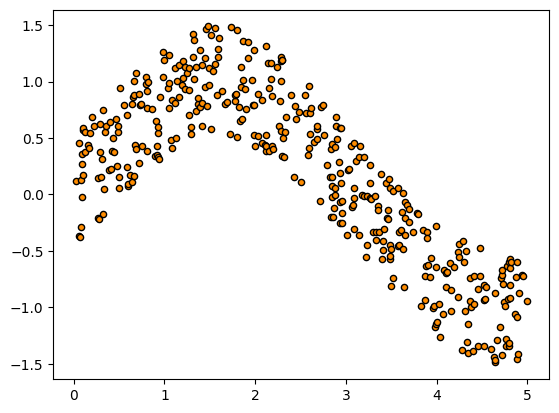

In [73]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.sort(5 * np.random.rand(400, 1), axis=0)
T = np.linspace(0, 5 ,500)[:, np.newaxis]
y = np.sin(X).ravel()

y[::1] += 1*(0.5 - np.random.rand(400))
plt.scatter(X, y, s=20, edgecolor='black', c='darkorange', label='data')


In [74]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape )

(280, 1) (120, 1) (280,) (120,)


In [75]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

y_1 = regr_1.fit(train_x, train_y).predict(test_x)
y_2 = regr_2.fit(train_x, train_y).predict(test_x)

preds = [y_1, y_2]
weights = ['max_depth=2', 'max_depth=5']
elvs = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=weights, columns=elvs)
for pred, nm in zip(preds, weights):
    mse = mean_squared_error(test_y, pred)
    mae = mean_absolute_error(test_y, pred)
    rmse = np.sqrt(mse)

    results.loc[nm]['mse'] = round(mse, 2)
    results.loc[nm]['rmse'] = round(rmse, 2)
    results.loc[nm]['mae'] = round(mae, 2)

results



,mse,rmse,mae
max_depth=2,0.12,0.35,0.29
max_depth=5,0.12,0.35,0.3


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(results, *['mae'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(results, *['mae'], **{})
chart

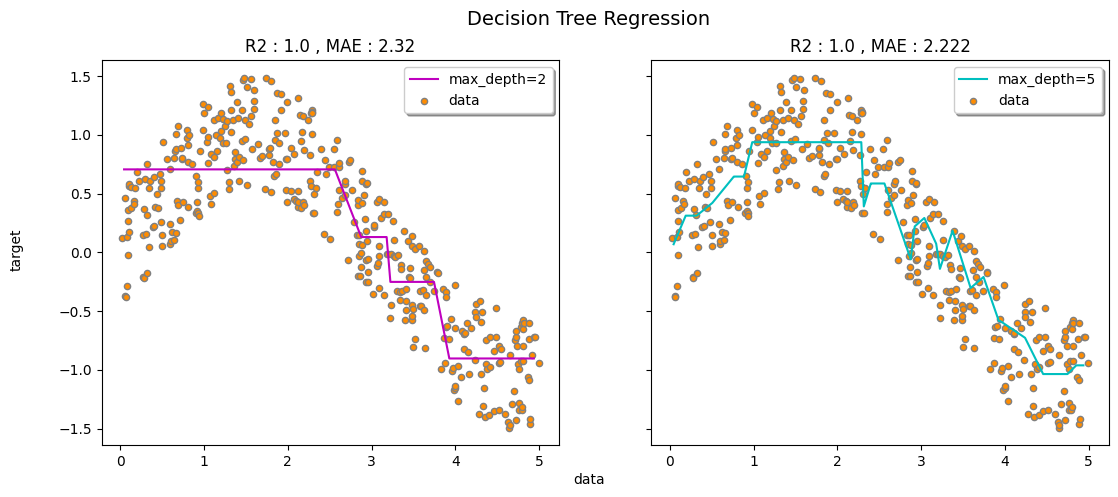

In [94]:
X_test = np.sort(5 * np.random.rand(40, 1), axis=0)

regrs = [regr_1, regr_2]
depths = ['max_depth=2', 'max_depth=5']
model_color = ['m', 'c']
fig, axes = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(13, 5))
for ix, regr in enumerate(regrs):
    pred = regr.fit(X, y).predict(X_test)
    r2 = regr.score(X_test, pred)
    mae = mean_absolute_error(X_test, pred)

    axes[ix].plot(X_test, pred, color=model_color[ix], label="{}".format(depths[ix]))
    axes[ix].scatter(X, y, s=20, edgecolor='gray', c='darkorange', label='data')
    axes[ix].legend(loc='upper right', ncol=1, fancybox=True, shadow=True)
    axes[ix].set_title('R2 : {r} , MAE : {m}'.format(r = round(r2, 3), m = round(mae, 3)))

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle('Decision Tree Regression', fontsize=14)
plt.show()